# Lab Experiment 9

Runtime Environment

In [ ]:
%pip install numpy pandas matplotlib statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

Time Series Data

In [3]:
# Generate example time series data
np.random.seed(0)
n = 500
ar_params = [1, -0.5]
ma_params = [1, 0.5]
arma_process = ArmaProcess(ar_params, ma_params)
data = arma_process.generate_sample(nsample=n)

ACF and PACF

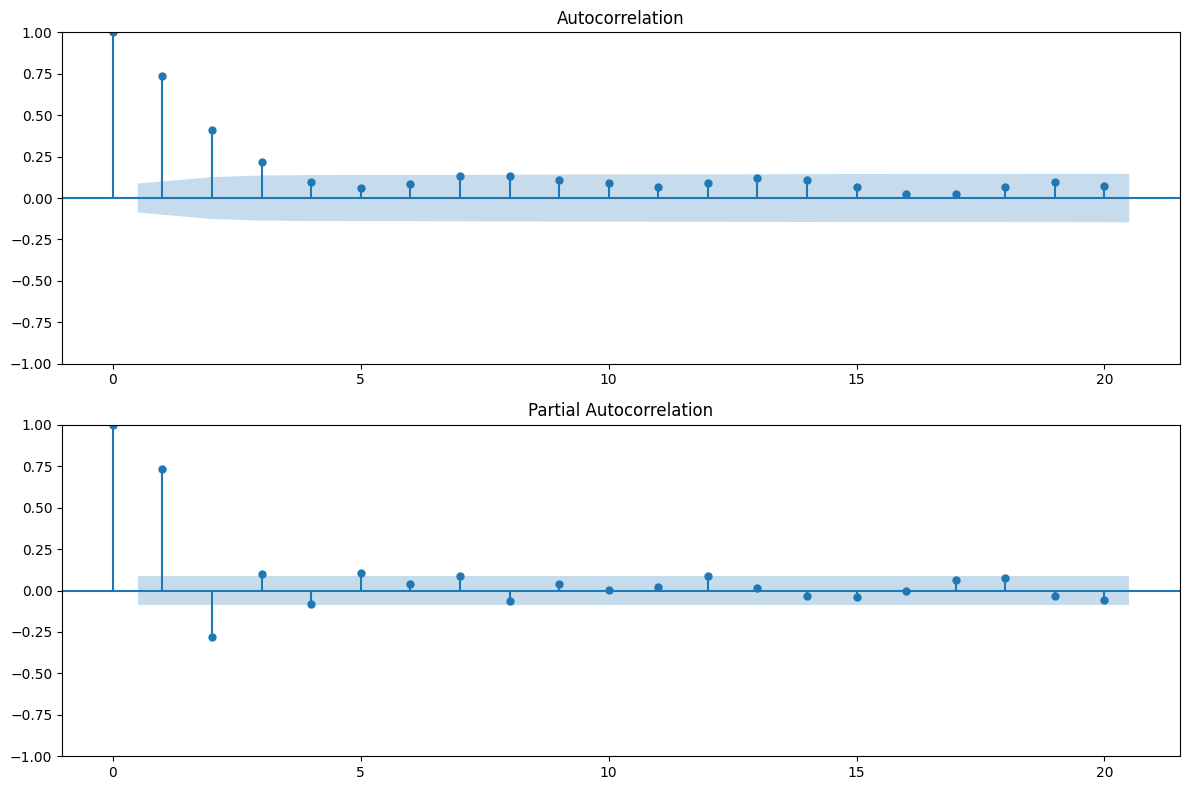

In [4]:
# Plot ACF and PACF
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(data, lags=20, ax=plt.gca())
plt.subplot(2, 1, 2)
plot_pacf(data, lags=20, ax=plt.gca())
plt.tight_layout()
plt.show()

MA, AR and ARMA Model

In [6]:
def fit_models(data):
    # Fit MA model
    ma_model = ARIMA(data, order=(0, 0, 1)).fit()
    print("MA Model Summary:")
    print(ma_model.summary())

    # Fit AR model
    ar_model = AutoReg(data, lags=1).fit()
    print("\nAR Model Summary:")
    print(ar_model.summary())

    # Fit ARMA model
    arma_model = ARIMA(data, order=(1, 0, 1)).fit()
    print("\nARMA Model Summary:")
    print(arma_model.summary())

fit_models(data)

MA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -752.694
Date:                Tue, 05 Nov 2024   AIC                           1511.389
Time:                        06:40:37   BIC                           1524.033
Sample:                             0   HQIC                          1516.350
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0726      0.086     -0.843      0.399      -0.241       0.096
ma.L1          0.7653      0.031     25.037      0.000       0.705       0.825
sigma2         1.1867      0.077  

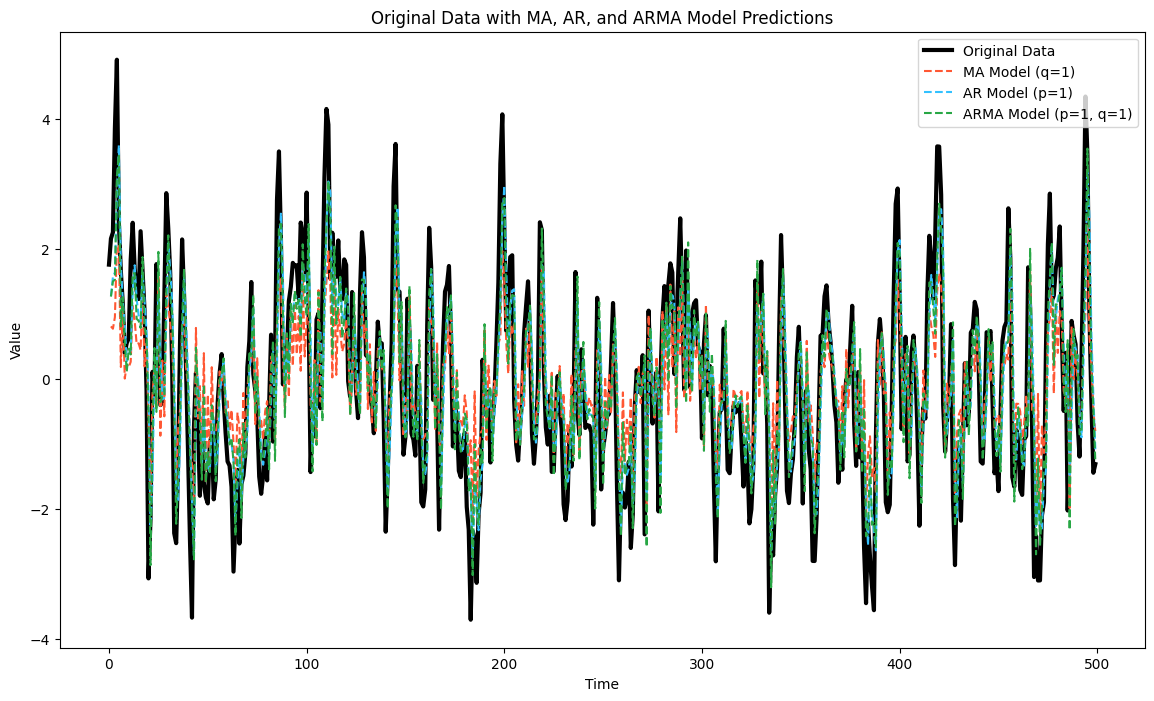

In [11]:
# Define and fit the MA, AR, and ARMA models
ma_model = ARIMA(data, order=(0, 0, 1)).fit()
ar_model = ARIMA(data, order=(1, 0, 0)).fit()
arma_model = ARIMA(data, order=(1, 0, 1)).fit()

# Generate in-sample predictions for visualization
data_index = np.arange(len(data))
ma_pred = ma_model.predict(start=1, end=len(data) - 1)
ar_pred = ar_model.predict(start=1, end=len(data) - 1)
arma_pred = arma_model.predict(start=1, end=len(data) - 1)

# Plot the original data and model predictions
plt.figure(figsize=(14, 8))
plt.plot(data_index, data, label="Original Data", color="black", linewidth=3)
plt.plot(data_index[1:], ma_pred, label="MA Model (q=1)", color="#FF5733", linestyle="--")
plt.plot(data_index[1:], ar_pred, label="AR Model (p=1)", color="#33C1FF", linestyle="--")
plt.plot(data_index[1:], arma_pred, label="ARMA Model (p=1, q=1)", color="#28A745", linestyle="--")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Original Data with MA, AR, and ARMA Model Predictions")
plt.show()